### Задание №1.
Измените функцию `calc_logloss` так, чтобы нули по возможности не попадали в `np.log` (как вариант - использовать `np.clip` или `np.where`).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-ticks')
plt.rcParams.update({'font.size': 14})

In [2]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [3]:
def calc_logloss(y, pred_probas):
    pred_probas = np.clip(pred_probas, 1e-30, 1 - 1e-30)
    return np.mean(- y * np.log(pred_probas) - (1 - y) * np.log(1 - pred_probas))

In [4]:
calc_logloss(1, 0)

69.07755278982137

___

### Задание №2.
На данных из урока изучите влияние гиперпараметров на ошибку алгоритма. Подберите аргументы функции `eval_LR_model` для логистической регрессии таким образом, чтобы log loss не превышал значение `0.3` `(0.1).` Как изменились веса?

In [5]:
def eval_LR_model(X, y, iters=1000, alpha=1e-3, saving_weights_errs=False, random_state=None, verbose=False):
    if random_state:
        np.random.seed(random_state)
    
    w = np.random.randn(X.shape[1])
    pred_probas = sigmoid(np.dot(X, w))
    n = X.shape[0]
    weights_arr = []
    errs_arr = []
    
    for i in range(1, iters + 1):
        w -= alpha * np.dot(pred_probas - y, X) / n
        if saving_weights_errs:
            weights_arr.append(w.copy())
        
        pred_probas = sigmoid(np.dot(X, w))
        
        err = calc_logloss(y, pred_probas)
        if saving_weights_errs:
            errs_arr.append(err)
        
        if verbose and i % (iters / 10) == 0:
            print(i, w, err)
    
    weights_arr = np.array(weights_arr)
    errs_arr = np.array(errs_arr)
    
    return (weights_arr, errs_arr) if saving_weights_errs else w

In [6]:
def std_scale(x):
    return (x - x.mean()) / x.std()

In [7]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],  # стаж репетитора
              [500, 700, 750, 600, 1450,        # средняя стоимость занятия
               800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 1, 3, 3, 1, 2]],  # квалификация репетитора
              dtype = np.float64).T 

y = np.array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1])

In [8]:
X_st = X.copy()
for i in range(1, 4):
    X_st[:, i] = std_scale(X_st[:, i])

__Построим графики зависимостей:__

In [9]:
ws_01, es_01 = eval_LR_model(X_st, y, iters=1000, saving_weights_errs=True, alpha=1e-1, random_state=23)
ws_1, es_1 = eval_LR_model(X_st, y, iters=1000, saving_weights_errs=True, alpha=1, random_state=23)
ws_4, es_4 = eval_LR_model(X_st, y, iters=1000, saving_weights_errs=True, alpha=4, random_state=23)

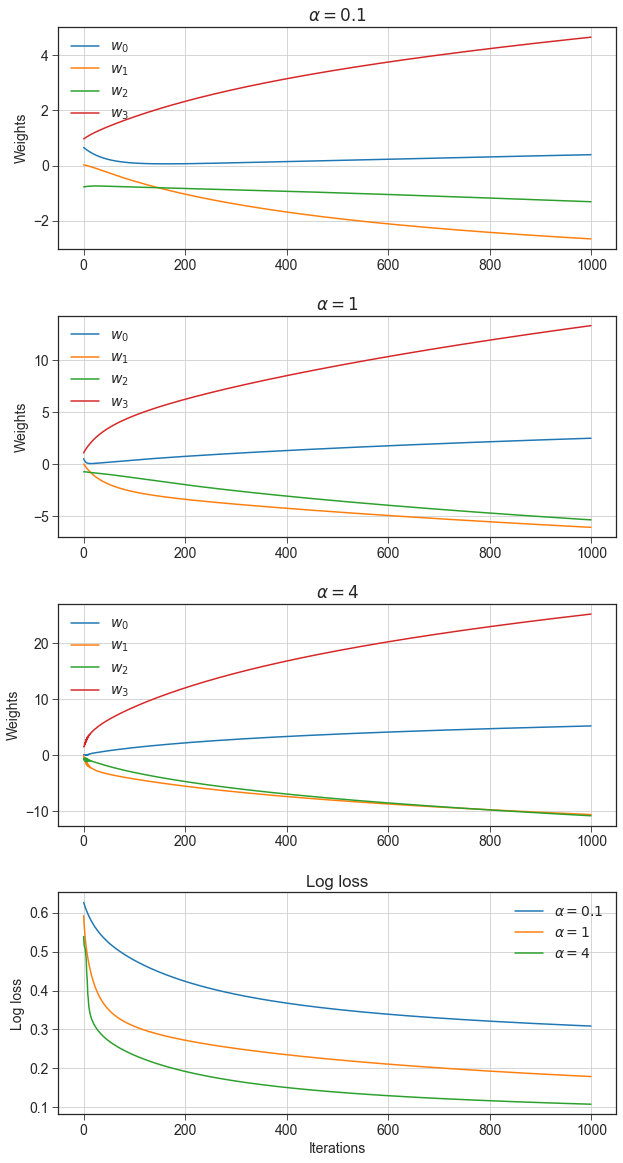

In [10]:
plt.figure(figsize=(10, 20))
plt.subplots_adjust(hspace=0.3)
plt.title(r'$\alpha=0.1$')
plt.ylabel('Weights')
plt.xlabel('Iterations')
plt.subplot(411)
plt.title(r'$\alpha=0.1$')
plt.ylabel('Weights')
plt.plot(range(1000), ws_01[:, 0], label=r'$w_0$')
plt.plot(range(1000), ws_01[:, 1], label=r'$w_1$')
plt.plot(range(1000), ws_01[:, 2], label=r'$w_2$')
plt.plot(range(1000), ws_01[:, 3], label=r'$w_3$')
plt.grid()
plt.legend()
plt.subplot(412)
plt.title(r'$\alpha=1$')
plt.ylabel('Weights')
plt.plot(range(1000), ws_1[:, 0], label=r'$w_0$')
plt.plot(range(1000), ws_1[:, 1], label=r'$w_1$')
plt.plot(range(1000), ws_1[:, 2], label=r'$w_2$')
plt.plot(range(1000), ws_1[:, 3], label=r'$w_3$')
plt.grid()
plt.legend()
plt.subplot(413)
plt.title(r'$\alpha=4$')
plt.ylabel('Weights')
plt.plot(range(1000), ws_4[:, 0], label=r'$w_0$')
plt.plot(range(1000), ws_4[:, 1], label=r'$w_1$')
plt.plot(range(1000), ws_4[:, 2], label=r'$w_2$')
plt.plot(range(1000), ws_4[:, 3], label=r'$w_3$')
plt.grid()
plt.legend()
plt.subplot(414)
plt.title('Log loss')
plt.ylabel('Log loss')
plt.xlabel('Iterations')
plt.plot(range(1000), es_01, label=r'$\alpha=0.1$')
plt.plot(range(1000), es_1, label=r'$\alpha=1$')
plt.plot(range(1000), es_4, label=r'$\alpha=4$')
plt.legend()
plt.grid()

Как можем заметить из зависимостей, увеличение $\alpha$ дает первоначальное падание ошибки алгоритма, дальнейшее уменьшение ошибки (увеличение точности) осуществляется за счет увеличения числа итераций. Веса в свою очередь увеличиваются по модулю с ростом и $\alpha$, и количества итераций.

In [11]:
w_03 = eval_LR_model(X_st, y, iters=1250, alpha=1e-1, random_state=23, verbose=True)

125 [ 0.06881296 -0.69266827 -0.79238246  1.91106562] 0.46184908877541436
250 [ 0.08023169 -1.22529544 -0.85367764  2.55251905] 0.4054776991794232
375 [ 0.13157544 -1.61538388 -0.91780184  3.05053754] 0.3727906535894506
500 [ 0.18618161 -1.9152708  -0.98813545  3.45928375] 0.35154240546813603
625 [ 0.23998712 -2.15418492 -1.06401147  3.80838983] 0.3365096921702178
750 [ 0.29227152 -2.35002054 -1.14399075  4.11544352] 0.3251569153900369
875 [ 0.34294194 -2.51442921 -1.22668564  4.3915587 ] 0.3161369622823531
1000 [ 0.39207112 -2.6553471  -1.31095412  4.64412119] 0.3086810720337304
1125 [ 0.43977356 -2.77836675 -1.39591347  4.87824471] 0.3023241909519635
1250 [ 0.48616594 -2.88753412 -1.48090432  5.09759109] 0.29677091202337713


In [12]:
w_01 = eval_LR_model(X_st, y, iters=1250, alpha=4, random_state=23, verbose=True)

125 [ 1.5616684  -4.63054568 -3.56597339  9.52404174] 0.2210143224393626
250 [ 2.50361842 -6.09861941 -5.38515647 13.37174333] 0.17837571685520892
375 [ 3.19262767 -7.22113212 -6.73791282 16.27916829] 0.1542450913184606
500 [ 3.73480405 -8.12827652 -7.82166942 18.62365273] 0.1386330686489517
625 [ 4.18232065 -8.88953464 -8.73159816 20.59591777] 0.12762225049594317
750 [ 4.56437395 -9.54617374 -9.52121004 22.30606668] 0.11936431366667513
875 [  4.89874819 -10.12441533 -10.22326922  23.82275964] 0.11288168405560121
1000 [  5.19699458 -10.64184112 -10.85913434  25.19138993] 0.10761135572992435
1125 [  5.46700292 -11.11076678 -11.44342239  26.44338671] 0.1032068875035431
1250 [  5.71438364 -11.54013582 -11.98653055  27.60133598] 0.09944355212158477


Ошибка алгоритма не превышает 0.3 при параметрах $\alpha=10^{-1}$ и 1250 итерациях. Ошибка алгоритма снижается до 0.1 при $\alpha=4$ и 1250 итерациях. Веса при этом по модулю вырастают более чем в 5 раз.
___

### Задание №3.
Создайте функцию `calc_pred_proba`, возвращающую предсказанную вероятность класса "1". На вход функции подаются значения признаков Х и веса, которые уже посчитаны функцией `eval_LR_model`.

In [13]:
def calc_pred_proba(X, w):
    return sigmoid(np.dot(X, w))

In [14]:
calc_pred_proba(X_st, w_03)

array([0.27251622, 0.16900358, 0.97702545, 0.21631024, 0.64130241,
       0.29591029, 0.9925539 , 0.14298075, 0.30381625, 0.95196557])

In [15]:
calc_pred_proba(X_st, w_01)

array([0.33463533, 0.00357131, 1.        , 0.0407276 , 0.94911095,
       0.01831155, 1.        , 0.01506153, 0.63383246, 0.99999999])

___

### Задание №4.
Создайте функцию `calc_pred`, возвращающую предсказанные классы (0 или 1). На вход функции подаются значения признаков Х и веса, которые уже посчитаны функцией `eval_LR_model`, а также порог вероятности.

In [16]:
def calc_pred(X, w, treshold=0.5):
    return np.where(sigmoid(np.dot(X, w)) > treshold, 1, 0)

In [17]:
calc_pred(X_st, w_03)

array([0, 0, 1, 0, 1, 0, 1, 0, 0, 1])

In [18]:
calc_pred(X_st, w_01)

array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1])

In [19]:
y

array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1])

___

### Задание №5*.
Напишите функции для расчета accuracy, матрицы ошибок, precision и recall, а также F1-score.